## ANALYSE DES DONNEES

In [65]:
from sklearn.datasets import load_digits
digits = load_digits()

X = digits.data
y = digits.target

In [66]:
import numpy as np
from collections import Counter

print(np.shape(X))
print(np.shape(y))
print(np.unique(y))
d = Counter(y)
for i in range(0,10) :
    print(d[i])


(1797, 64)
(1797,)
[0 1 2 3 4 5 6 7 8 9]
178
182
177
183
181
182
181
179
174
180


<Figure size 640x480 with 0 Axes>

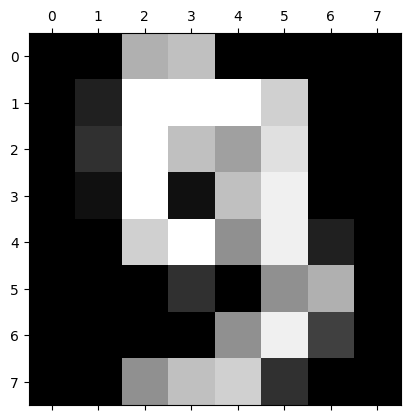

In [67]:
import matplotlib.pyplot as plt
plt.gray()
plt.matshow(digits.images[9]) #index est le numéro de l’image
plt.show()

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3,random_state=1)

## APPRENTISSAGE

C:\Users\Acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Acer\AppDa

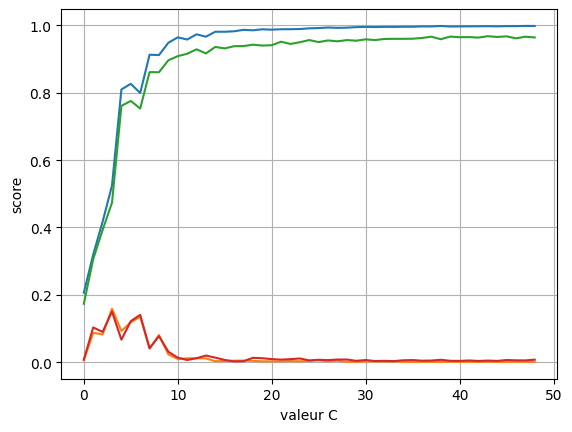

In [69]:
#réseau multi-couche
from sklearn.neural_network import MLPClassifier

#learning rate
A = 0.01
#epoch
B = 100

acc_train_mean = []
acc_test_mean = []
acc_train_std = []
acc_test_std = []

for i in range(1,50, 1) :
    #hidden layer size
    C = i

    acc_train = []
    acc_test = []
    for rep in range(5):
        clf3 = MLPClassifier(hidden_layer_sizes=C, activation='tanh', solver='adam', learning_rate_init=A, 
                    max_iter=B, learning_rate='adaptive', shuffle=True, batch_size=len(y_train))
        clf3.fit(X_train, y_train)

        #score sur la base d'apprentissage
        acc_train.append(clf3.score(X_train, y_train))

        #score sur la base de test
        acc_test.append(clf3.score(X_test, y_test))

    acc_train_mean.append(np.mean(acc_train))
    acc_train_std.append(np.std(acc_train))
    acc_test_mean.append(np.mean(acc_test))
    acc_test_std.append(np.std(acc_test))

plt.plot(acc_train_mean)
plt.plot(acc_train_std)
plt.plot(acc_test_mean)
plt.plot(acc_test_std)
plt.grid()
plt.xlabel('valeur C')
plt.ylabel('score')
plt.show()

In [70]:
#réseau multi-couche
from sklearn.neural_network import MLPClassifier

#learning rate
A = 0.01
#epoch
B = 100
#hidden layer size
C = 20

clf4 = MLPClassifier(hidden_layer_sizes=C, activation='tanh', solver='adam', learning_rate_init=A,max_iter=B, learning_rate='constant', shuffle=True, batch_size=len(y_train))

clf4.fit(X_train, y_train)
print('best loss = ', clf4.best_loss_)
print(clf4.score(X_train, y_train))
print(clf4.score(X_test, y_test))

best loss =  0.07331221235333965
0.9872712808273667
0.9462962962962963


C:\Users\Acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


## CROSS-VALIDATION

In [71]:
from sklearn.model_selection import validation_curve

C = np.arange(1, 50, 5)

train_scores, validation_scores = validation_curve(
        MLPClassifier(activation='tanh', solver='adam', batch_size=1,alpha=0, learning_rate='adaptive',early_stopping=True, validation_fraction=0.2), 
        X_train, y_train, param_name="hidden_layer_sizes",param_range=C,scoring="accuracy", n_jobs=2)

In [72]:
mean_train = []
mean_test = []
for i in range(len(train_scores)):
    mean_train.append(np.mean(train_scores[i]))

for i in range(len(validation_scores)):
    mean_test.append(np.mean(validation_scores[i]))

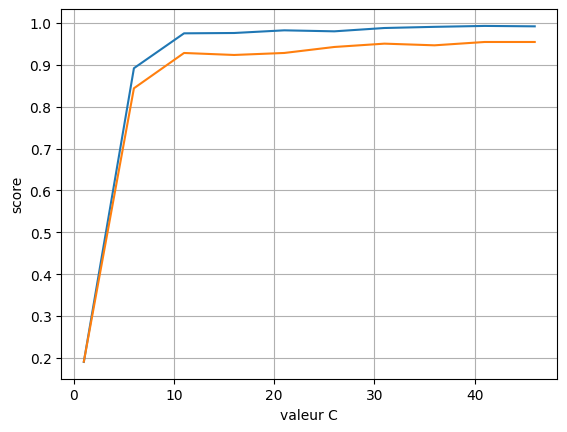

In [73]:
plt.plot(C, mean_train)
plt.plot(C, mean_test)
plt.grid()
plt.xlabel('valeur C')
plt.ylabel('score')
plt.show()

In [74]:
#réseau multi-couche
from sklearn.neural_network import MLPClassifier

#learning rate
A = 0.01
#epoch
B = 100
#hidden layer size
C = 20

clf5 = MLPClassifier(hidden_layer_sizes=C, activation='tanh', solver='adam', learning_rate_init=A,max_iter=B, learning_rate='constant', shuffle=True, batch_size=len(y_train))

clf5.fit(X_train, y_train)
print('best loss = ', clf5.best_loss_)
print(clf5.score(X_train, y_train))
print(clf5.score(X_test, y_test))

best loss =  0.08522404234091928
0.9856801909307876
0.9555555555555556


C:\Users\Acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


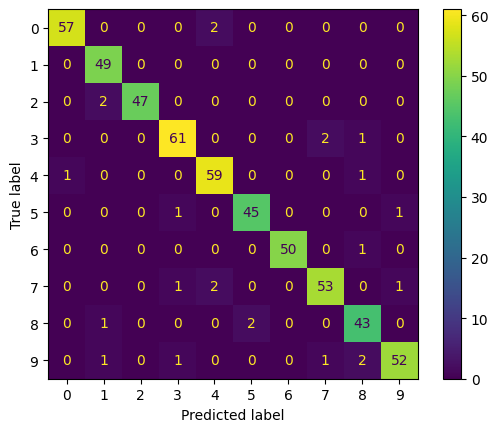

In [75]:
y_pred_test = clf5.predict(X_test)

#matrice de confusion
from sklearn import metrics
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)

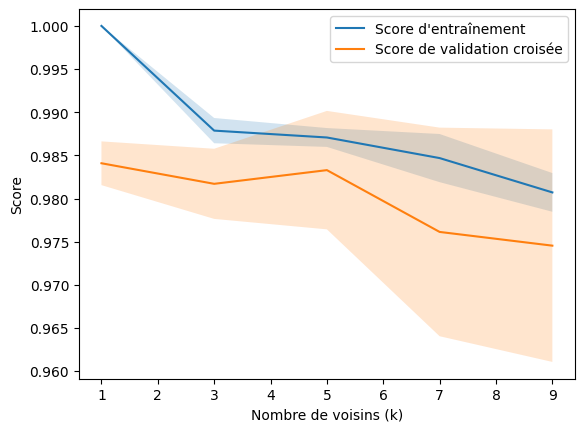

In [76]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

# Définir les valeurs à tester pour le paramètre k
param_range = [1,3,5,7,9]

# Instancier un classificateur KNN
knn = KNeighborsClassifier()

# Définir les plis pour la validation croisée
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Calculer les scores d'entraînement et de validation pour chaque valeur de k
train_scores, valid_scores = validation_curve(knn, X_train, y_train, param_name='n_neighbors', param_range=param_range, cv=kf)

# Calculer la moyenne et l'écart type des scores d'entraînement et de validation pour chaque valeur de k
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

# Afficher les résultats
import matplotlib.pyplot as plt

plt.plot(param_range, train_mean, label='Score d\'entraînement')
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.plot(param_range, valid_mean, label='Score de validation croisée')
plt.fill_between(param_range, valid_mean - valid_std, valid_mean + valid_std, alpha=0.2)
plt.xlabel('Nombre de voisins (k)')
plt.ylabel('Score')
plt.legend()
plt.show()

## REJET

In [77]:
def argmax_reject_threshold(y, threshold):
    y_argmax = np.argmax(y, axis=1)
    y_masked = np.ma.array(y_argmax, mask=(np.amax(y, axis=1) < threshold))

    return y_masked.filled(-1)

def argmax_top2_reject_threshold(y, threshold):
    y_argmax = np.argmax(y, axis=1)
    y_top2 = np.sort(y, axis=1)[:,-1:-3:-1]
    y_masked = np.ma.array(y_argmax, mask=((y_top2[:,0] - y_top2[:,1]) < threshold))

    return y_masked.filled(-1)

C:\Users\Acer\AppData\Local\Temp\ipykernel_18968\1820789391.py:20: RuntimeWarning: invalid value encountered in double_scalars
  rejection_rate = matrix[0,-1] / np.sum(matrix[:,-1])
C:\Users\Acer\AppData\Local\Temp\ipykernel_18968\1820789391.py:20: RuntimeWarning: invalid value encountered in double_scalars
  rejection_rate = matrix[0,-1] / np.sum(matrix[:,-1])
C:\Users\Acer\AppData\Local\Temp\ipykernel_18968\1820789391.py:20: RuntimeWarning: invalid value encountered in double_scalars
  rejection_rate = matrix[0,-1] / np.sum(matrix[:,-1])
C:\Users\Acer\AppData\Local\Temp\ipykernel_18968\1820789391.py:20: RuntimeWarning: invalid value encountered in double_scalars
  rejection_rate = matrix[0,-1] / np.sum(matrix[:,-1])
C:\Users\Acer\AppData\Local\Temp\ipykernel_18968\1820789391.py:20: RuntimeWarning: invalid value encountered in double_scalars
  rejection_rate = matrix[0,-1] / np.sum(matrix[:,-1])
C:\Users\Acer\AppData\Local\Temp\ipykernel_18968\1820789391.py:20: RuntimeWarning: invalid

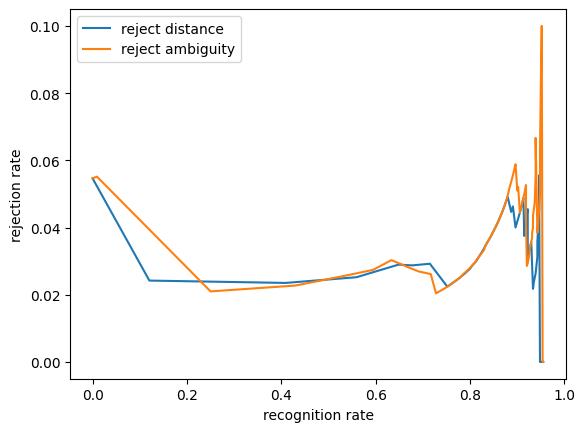

In [80]:
def confusion_matrix(y_true, y_pred):
    n_classes = len(np.unique(y_true))
    matrix = np.zeros((n_classes+1, n_classes+1))
    for i in range(n_classes):
        for j in range(n_classes):
            matrix[i, j] = np.sum((y_true == i) & (y_pred == j))
        matrix[i, -1] = np.sum(y_true == i) - np.sum(matrix[i, :-1])
        matrix[-1, i] = np.sum(y_pred == i) - np.sum(matrix[:-1, i])
    matrix[-1, -1] = np.sum((y_pred == -1) & (y_true != -1))
    return matrix

def evaluate_rejection_method(model, X, y_true, reject_func):
    thresholds = np.arange(0, 1.01, 0.01)
    recognition_rates = []
    rejection_rates = []
    for threshold in thresholds:
        y_pred = reject_func(model.predict_proba(X), threshold)
        matrix = confusion_matrix(y_true, y_pred)
        recognition_rate = np.sum(np.diag(matrix[:-1,:-1])) / np.sum(matrix[:-1,:])
        rejection_rate = matrix[0,-1] / np.sum(matrix[:,-1])
        recognition_rates.append(recognition_rate)
        rejection_rates.append(rejection_rate)
    return thresholds, recognition_rates, rejection_rates

thresholds, recognition_rates_reject_distance, rejection_rates_reject_distance = evaluate_rejection_method(clf5, X_test, y_test, argmax_reject_threshold)
thresholds, recognition_rates_reject_ambiguity, rejection_rates_reject_ambiguity = evaluate_rejection_method(clf5, X_test, y_test, argmax_top2_reject_threshold)
import matplotlib.pyplot as plt

plt.plot(recognition_rates_reject_distance, rejection_rates_reject_distance, label='reject distance')
plt.plot(recognition_rates_reject_ambiguity, rejection_rates_reject_ambiguity, label='reject ambiguity')
plt.xlabel('recognition rate')
plt.ylabel('rejection rate')
plt.legend()
plt.show()

## Cascade de classifieurs
